# Sea_Level_Prediction

### IMPORTING THE REQUIRED LIBRARIES:-

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import linregress
from matplotlib import pyplot as plt
from sklearn import linear_model
import csv 
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid',palette='hsv')
df=pd.read_csv("C:\\Users\\subba\\OneDrive\\Desktop\\COLLEGE\\epa-sea-level_csv.csv")
df2=df

### SOFT READING THE DATA

In [32]:
df2.head()
#df2.describe()
#df2.info()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN
1,1881-03-15,0.220472,-0.732283,1.173228,NaN
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN
4,1884-03-15,0.590551,-0.283465,1.464567,NaN


### DATA PREPROCESSING

In [31]:
#droping the unwanted columns

In [33]:
df2=df2.drop('Year',axis=1)

In [34]:
df2=df2.drop(['NOAA Adjusted Sea Level'],axis=1)

In [35]:
#adding the desired coloumn

In [36]:
yr=list(range(1880,2015))
df2['only_year']=yr

In [37]:
df2.head()

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,only_year
0,0.000000,-0.952756,0.952756,1880
1,0.220472,-0.732283,1.173228,1881
2,-0.440945,-1.346457,0.464567,1882
3,-0.232283,-1.129921,0.665354,1883
4,0.590551,-0.283465,1.464567,1884


### DATA CLEANING

In [38]:
def clean_dataset(df2):
    assert isinstance(df2, pd.DataFrame), "df needs to be a pd.DataFrame"
    df2.dropna(inplace=True)
    indices_to_keep = ~df2.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df2[indices_to_keep].astype(np.float64)

In [39]:
clean_dataset(df2)

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,only_year
0,0.000000,-0.952756,0.952756,1880.0
1,0.220472,-0.732283,1.173228,1881.0
2,-0.440945,-1.346457,0.464567,1882.0
3,-0.232283,-1.129921,0.665354,1883.0
4,0.590551,-0.283465,1.464567,1884.0
...,...,...,...,...
129,8.586614,8.311024,8.862205,2009.0
130,8.901575,8.618110,9.185039,2010.0
131,8.964567,8.661417,9.267717,2011.0
132,9.326772,8.992126,9.661417,2012.0


In [40]:
df2.isnull().sum()

CSIRO Adjusted Sea Level    0
Lower Error Bound           0
Upper Error Bound           0
only_year                   0
dtype: int64

### VISUALIZING THE DATA

In [41]:
# Read data from file
y=df2['CSIRO Adjusted Sea Level']
x=df2['only_year']

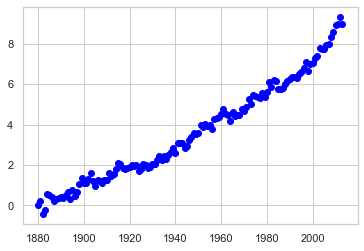

In [42]:
# Create scatter plot
plt.scatter(x,y,color='blue')
plt.show()

### PREPARING THE TRAINING AND TESTING DATA

In [43]:
cdf=df2[['only_year','CSIRO Adjusted Sea Level']]
msk=np.random.rand(len(df2))<0.8
train=cdf[msk]
test=cdf[~msk]

### BUILDING THE REGRESSION MODEL 

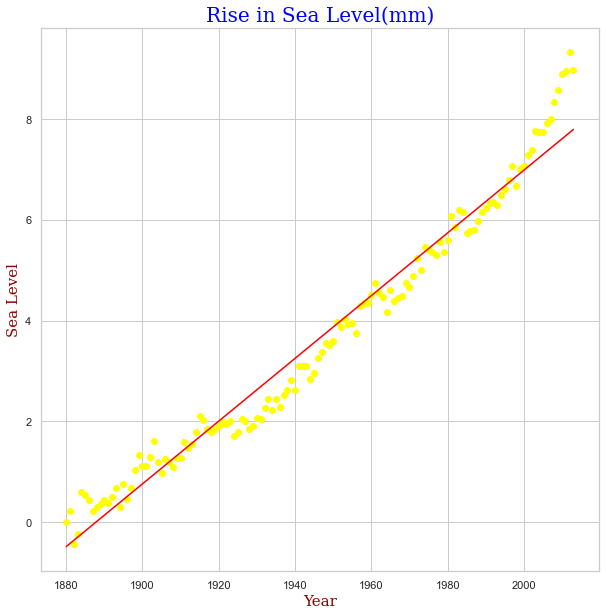

In [44]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['only_year']])
train_y = np.asanyarray(train[['CSIRO Adjusted Sea Level']])
plt.figure(figsize=(10,10))
a=plt.scatter(x,y,color='yellow')
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel('Year',fontdict = font2)
plt.ylabel('Sea Level',fontdict = font2)
plt.title('Rise in Sea Level(mm)',fontdict = font1)
regr.fit(train_x, train_y)
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'r')
plt.show()

Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

In [45]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.06227219]]
Intercept:  [-117.55555647]


### EVALUATION 

In [17]:
predicted_values=regr.predict(test[['only_year']])

In [18]:
from sklearn.metrics import r2_score as a

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [19]:
a(predicted_values,test[['CSIRO Adjusted Sea Level']])

0.978189255635937

### CONCLUSION 

If we calcuate the increase in sea level per month, by this we can conclude that there will be rise of 3.2(+/-)mm/year

In [26]:
x_arr=[[2023]]


In [27]:
regr.predict(x_arr)

array([[8.51549536]])